### Task 1

1. Take the dataset of Iris. 
2. Initialize a neural network with random weights.
3. Calculate output of Neural Network: 
4. Calculate MSE 
5. Plot error surface using loss function verses weight, bias 
6. Perform this cycle in step c for every input output pair 
7. Perform 10 epochs of step d
8. Update weights accordingly using stochastic gradient descend. 
9. Plot the mean squared error for each iteration in stochastic Gradient Descent. 
10. Similarly plot accuracy for iteration and note the results 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

# 1. Take the dataset of Iris
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
print(X.shape, y.shape)
# Preprocessing
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split (using full dataset for training as implied by "dataset of Iris")
X_train, y_train = X_scaled, y_onehot

(150, 4) (150, 1)


In [28]:
# 2. Initialize a neural network with random weights
# Simple architecture: 4 Inputs -> 3 Outputs (Linear layer + Sigmoid activation)
input_size = 4
output_size = 3

np.random.seed(42)
weights = np.random.randn(input_size, output_size)
bias = np.random.randn(output_size)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def predict(inputs, w, b):
    # 3. Calculate output of Neural Network
    return sigmoid(np.dot(inputs, w) + b)

def calculate_mse(y_true, y_pred):
    # 4. Calculate MSE
    return np.mean((y_true - y_pred) ** 2)

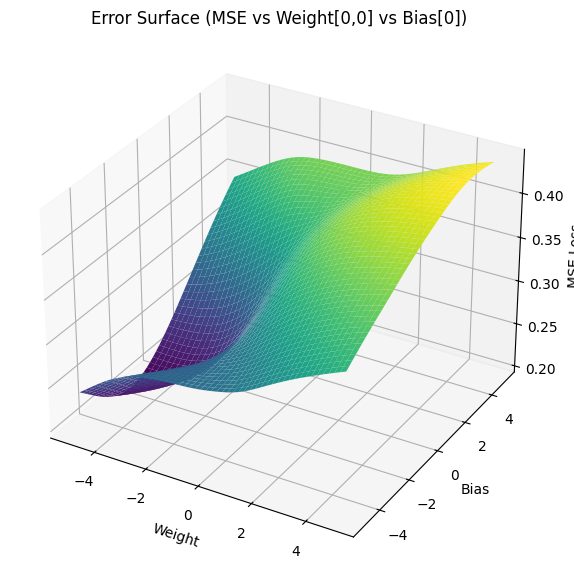

In [29]:
# 5. Plot error surface using loss function verses weight, bias
# We pick one weight (w[0,0]) and one bias (b[0]) to vary for visualization
w_range = np.linspace(-5, 5, 50)
b_range = np.linspace(-5, 5, 50)
W_grid, B_grid = np.meshgrid(w_range, b_range)
loss_grid = np.zeros_like(W_grid)

w_temp = weights.copy()
b_temp = bias.copy()

for i in range(len(w_range)):
    for j in range(len(b_range)):
        w_temp[0, 0] = W_grid[i, j]
        b_temp[0] = B_grid[i, j]
        # Compute total MSE for dataset with these parameters
        y_out = predict(X_train, w_temp, b_temp)
        loss_grid[i, j] = calculate_mse(y_train, y_out)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W_grid, B_grid, loss_grid, cmap='viridis')
ax.set_title('Error Surface (MSE vs Weight[0,0] vs Bias[0])')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('MSE Loss')
plt.show()

In [30]:
# Training loop parameters
learning_rate = 0.1
epochs = 10
mse_history = []
accuracy_history = []

print("Starting training...")

for epoch in range(epochs):
    epoch_errors = []
    correct_predictions = 0
    
    # 6. Perform this cycle in step c for every input output pair
    for i in range(len(X_train)):
        x_sample = X_train[i].reshape(1, -1)
        y_sample = y_train[i].reshape(1, -1)
        
        output = predict(x_sample, weights, bias)
        
        error = y_sample - output
        sample_mse = np.mean(error ** 2)
        epoch_errors.append(sample_mse)
        
        # Accuracy check
        if np.argmax(output) == np.argmax(y_sample):
            correct_predictions += 1
        
        
        d_output = error * sigmoid_derivative(output)
        
        weights += learning_rate * np.dot(x_sample.T, d_output)
        bias += learning_rate * np.sum(d_output, axis=0)

    avg_mse = np.mean(epoch_errors)
    epoch_acc = correct_predictions / len(X_train)
    
    mse_history.append(avg_mse)
    accuracy_history.append(epoch_acc)
    
    print(f"Epoch {epoch+1}/{epochs} - MSE: {avg_mse:.4f} - Accuracy: {epoch_acc:.4f}")


Starting training...
Epoch 1/10 - MSE: 0.2328 - Accuracy: 0.5067
Epoch 2/10 - MSE: 0.1114 - Accuracy: 0.7933
Epoch 3/10 - MSE: 0.0947 - Accuracy: 0.8133
Epoch 4/10 - MSE: 0.0892 - Accuracy: 0.8400
Epoch 5/10 - MSE: 0.0858 - Accuracy: 0.8467
Epoch 6/10 - MSE: 0.0833 - Accuracy: 0.8600
Epoch 7/10 - MSE: 0.0813 - Accuracy: 0.8600
Epoch 8/10 - MSE: 0.0796 - Accuracy: 0.8667
Epoch 9/10 - MSE: 0.0781 - Accuracy: 0.8667
Epoch 10/10 - MSE: 0.0768 - Accuracy: 0.8800


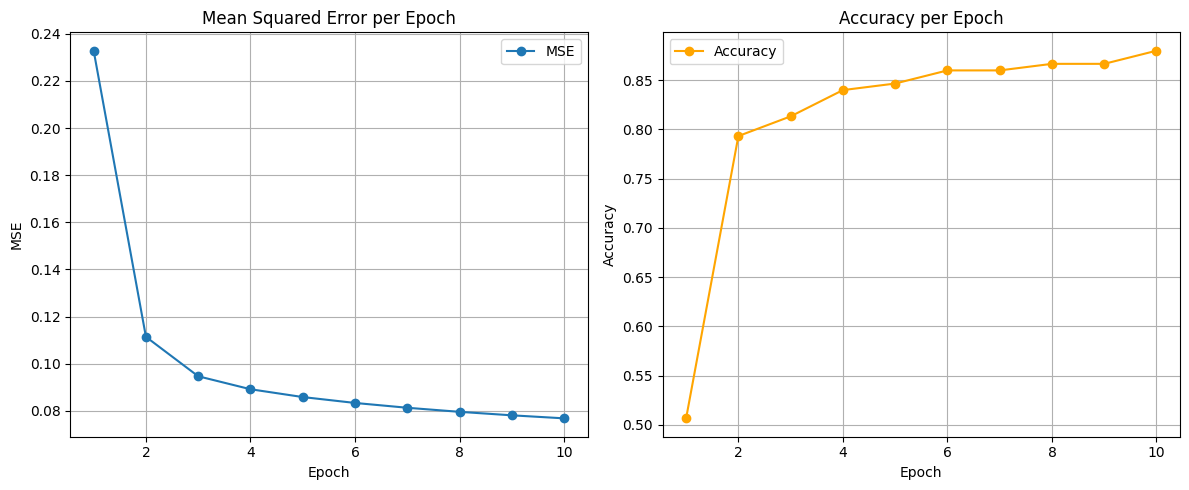

In [31]:
# 9. Plot the mean squared error for each iteration (epoch)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), mse_history, marker='o', label='MSE')
plt.title('Mean Squared Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()

# 10. Similarly plot accuracy for iteration and note the results
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracy_history, marker='o', color='orange', label='Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()